# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [5]:
file_path = 'data/Citywide_Payroll_Data__Fiscal_Year__20240428.csv'
data = pd.read_csv(file_path)

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

#### Show 5 rows, selected at random, from the data set.

In [6]:
random_sample = data.sample(5)
random_sample

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
526199,2023,858,TECHNOLOGY & INNOVATION,DIALLO,LAMARANA,NaN,06/06/2022,MANHATTAN,SUMMER COLLEGE INTERN,CEASED,17.5,per Hour,406.0,7105.0,0.0,0.0,245.00
221953,2023,742,DEPT OF ED PEDAGOGICAL,ESTRADA,DIANA,M,02/10/2020,MANHATTAN,TEACHER SPECIAL EDUCATION-REG SUB,CEASED,68652.0,per Annum,0.0,20023.5,0.0,0.0,-760.64
138568,2023,300,BOARD OF ELECTION POLL WORKERS,GOULD,KARLINE,NaN,01/02/2017,MANHATTAN,ELECTION WORKER,ACTIVE,1.0,per Hour,0.0,375.0,0.0,0.0,0.00
315532,2023,744,DEPT OF ED PARA PROFESSIONALS,HENRY,LURLINE,S,04/23/1999,MANHATTAN,ANNUAL ED PARA,ACTIVE,34403.0,per Annum,0.0,15792.9,0.0,0.0,3227.57
99009,2023,69,HRA/DEPT OF SOCIAL SERVICES,EDINBORO,LORRAINE,NaN,07/23/1990,BROOKLYN,JOB OPPORTUNITY SPECIALIST,CEASED,44219.0,per Annum,0.0,0.0,0.0,0.0,4833.14


#### Show each of the column names and their data types.

In [7]:
data_types = data.dtypes
data_types

Fiscal Year                     int64
Payroll Number                  int64
Agency Name                    object
Last Name                      object
First Name                     object
Mid Init                       object
Agency Start Date              object
Work Location Borough          object
Title Description              object
Leave Status as of June 30     object
Base Salary                   float64
Pay Basis                      object
Regular Hours                 float64
Regular Gross Paid            float64
OT Hours                      float64
Total OT Paid                 float64
Total Other Pay               float64
dtype: object

#### Show the number of unique values in each column

In [8]:
unique_values = data.nunique()
unique_values

Fiscal Year                        1
Payroll Number                   156
Agency Name                      156
Last Name                     112799
First Name                     64390
Mid Init                          37
Agency Start Date              12878
Work Location Borough             18
Title Description               1535
Leave Status as of June 30         5
Base Salary                    34557
Pay Basis                          4
Regular Hours                  17212
Regular Gross Paid            243450
OT Hours                       30500
Total OT Paid                 138043
Total Other Pay               233522
dtype: int64

#### Show a statistical summary for numerical columns

In [9]:
statistical_summary = data.describe()
statistical_summary

,Fiscal Year,Payroll Number,Base Salary,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
count,552938.0,552938.000000,552938.000000,552938.000000,552938.000000,552938.000000,552938.000000,552938.000000
mean,2023.0,573.035691,51337.371450,650.797779,47342.361612,72.551699,4575.784169,4352.708365
std,0.0,307.570095,48070.639384,883.960010,44230.169847,187.328651,12978.876359,7801.349333
min,2023.0,2.000000,1.000000,-1529.270000,-82023.270000,-96.750000,-7096.640000,-205944.480000
25%,2023.0,300.000000,33.180000,0.000000,4913.157500,0.000000,0.000000,0.000000
50%,2023.0,742.000000,48755.000000,0.000000,39244.800000,0.000000,0.000000,662.790000
75%,2023.0,747.000000,92073.000000,1820.000000,84744.340000,1.000000,83.882500,5646.572500
max,2023.0,996.000000,363346.000000,6666.000000,409058.380000,3172.500000,245420.330000,479358.000000


#### Check the missing values in each column

In [10]:
missing_values = data.isnull().sum()
missing_values

Fiscal Year                        0
Payroll Number                     0
Agency Name                        0
Last Name                        362
First Name                       374
Mid Init                      230983
Agency Start Date                  0
Work Location Borough              1
Title Description                  3
Leave Status as of June 30         0
Base Salary                        0
Pay Basis                          0
Regular Hours                      0
Regular Gross Paid                 0
OT Hours                           0
Total OT Paid                      0
Total Other Pay                    0
dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

#### Convert 'Agency Start Date' to datetime with Error Handling
Convert the 'Agency Start Date' from a string to a datetime object. Non-convertible dates will result in NaT, which we can then address.


In [11]:
# Convert 'Agency Start Date' to datetime, with error handling
data['Agency Start Date'] = pd.to_datetime(data['Agency Start Date'], errors='coerce')

# Check for any rows where 'Agency Start Date' couldn't be converted
non_convertible_rows = data[data['Agency Start Date'].isna()]

# Display non-convertible rows and the updated DataFrame head
non_convertible_rows, data[['First Name', 'Last Name', 'Agency Start Date']].head()

(        Fiscal Year  Payroll Number                    Agency Name  \
 209839         2023             742         DEPT OF ED PEDAGOGICAL   
 213660         2023             742         DEPT OF ED PEDAGOGICAL   
 225825         2023             742         DEPT OF ED PEDAGOGICAL   
 229616         2023             742         DEPT OF ED PEDAGOGICAL   
 246944         2023             742         DEPT OF ED PEDAGOGICAL   
 275086         2023             742         DEPT OF ED PEDAGOGICAL   
 277122         2023             742         DEPT OF ED PEDAGOGICAL   
 290517         2023             742         DEPT OF ED PEDAGOGICAL   
 308969         2023             744  DEPT OF ED PARA PROFESSIONALS   
 316835         2023             744  DEPT OF ED PARA PROFESSIONALS   
 316893         2023             744  DEPT OF ED PARA PROFESSIONALS   
 317660         2023             744  DEPT OF ED PARA PROFESSIONALS   
 321602         2023             744  DEPT OF ED PARA PROFESSIONALS   
 32420

#### Fill Missing Values for Middle Initial
Some entries might not have a middle initial recorded. In such cases, we fill the missing 'Mid Init' values with "N/A" for consistency.

In [12]:
# Fill missing values in 'Mid Init' with "N/A"
data['Mid Init'] = data['Mid Init'].fillna("N/A")

# Display the updated DataFrame to see the changes
data[['First Name', 'Mid Init']].head()

,First Name,Mid Init
0,SHIMA,N/A
1,RANA,N/A
2,RUTH,N/A
3,DOUGLAS,E
4,BERNARD,S


#### Validate and Clean Numerical Data
Validate that the numerical fields such as 'Regular Hours', 'OT Hours', and different types of pay do not contain negative values, which are not meaningful in this context.

In [13]:
# Validate that hours and pay are non-negative; if they are, set to zero
columns_to_validate = ['Regular Hours', 'OT Hours', 'Base Salary', 'Regular Gross Paid', 'Total OT Paid', 'Total Other Pay']
for column in columns_to_validate:
    data[column] = data[column].clip(lower=0)

# Display the updated DataFrame to check the changes
data[columns_to_validate].head()

,Regular Hours,OT Hours,Base Salary,Regular Gross Paid,Total OT Paid,Total Other Pay
0,1820.0,0.0,70747.0,70553.08,0.0,0.0
1,1820.0,0.0,80651.0,78595.96,0.0,0.0
2,1185.6,0.0,44039.0,28609.55,0.0,0.0
3,0.0,0.0,135904.0,0.00,0.0,84.5
4,1.0,0.0,1.0,1.00,0.0,0.0


#### Calculate Tenure and Overtime Pay Ratio
For each employee, calculate the tenure in years since their start date and the ratio of overtime pay to regular pay to gain additional insights.

In [14]:
# Calculate tenure in years, considering today's date and 'Agency Start Date'
current_date = pd.Timestamp.now()
data['Tenure Years'] = (current_date - data['Agency Start Date']).dt.days / 365.25

# Calculate the ratio of OT Pay to Regular Gross Pay, handling cases where the denominator is zero
data['OT to Regular Pay Ratio'] = data['Total OT Paid'] / data['Regular Gross Paid']
data['OT to Regular Pay Ratio'].fillna(0, inplace=True)  # Replace NaN results with 0

# Display the updated DataFrame to verify the new columns
data[['First Name', 'Last Name', 'Tenure Years', 'OT to Regular Pay Ratio']].head()

,First Name,Last Name,Tenure Years,OT to Regular Pay Ratio
0,SHIMA,ABACHI NEJADASL,3.006160,0.0
1,RANA,ABBASOVA,2.313484,0.0
2,RUTH,ACOSTA,26.135524,0.0
3,DOUGLAS,ADAMS,7.797399,0.0
4,BERNARD,ADAMS,2.212183,0.0


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### Descriptive Statistics for Base Salary and OT Payments
We will calculate descriptive statistics for `Base Salary` and `Total OT Paid` to understand their distribution, central tendency, and spread.

In [15]:
# Descriptive statistics for Base Salary and OT Payments
base_salary_stats = data['Base Salary'].describe()
ot_payments_stats = data['Total OT Paid'].describe()

# Display the results
base_salary_stats, ot_payments_stats

(count    552938.000000
 mean      51337.371450
 std       48070.639384
 min           1.000000
 25%          33.180000
 50%       48755.000000
 75%       92073.000000
 max      363346.000000
 Name: Base Salary, dtype: float64,
 count    552938.000000
 mean       4576.054052
 std       12978.756436
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%          83.882500
 max      245420.330000
 Name: Total OT Paid, dtype: float64)

#### Average Tenure and OT to Regular Pay Ratio by Agency
Calculate the average tenure and the average OT to Regular Pay Ratio for each agency to identify trends and outliers.

In [16]:
# Average Tenure and OT to Regular Pay Ratio by Agency
agency_stats = data.groupby('Agency Name').agg({
    'Tenure Years': 'mean',
    'OT to Regular Pay Ratio': 'mean'
})

# Display the results
agency_stats

,Tenure Years,OT to Regular Pay Ratio
Agency Name,,
ADMIN FOR CHILDREN'S SVCS,11.214046,NaN
ADMIN TRIALS AND HEARINGS,7.224823,0.001725
BOARD OF CORRECTION,6.680185,0.000002
BOARD OF ELECTION,9.325584,0.239726
BOARD OF ELECTION POLL WORKERS,8.012252,0.000000
...,...,...
STATEN ISLAND COMMUNITY BD #3,12.373260,0.000000
TAX COMMISSION,10.942277,0.020296
TAXI & LIMOUSINE COMMISSION,9.592439,NaN


#### Top Earners in Terms of Regular Gross Pay
Identifying the top 10 employees with the highest Regular Gross Pay to understand the outliers or high earners in the dataset.

In [17]:
# Top 10 earners by Regular Gross Pay
top_earners = data.nlargest(10, 'Regular Gross Paid')[['First Name', 'Last Name', 'Regular Gross Paid']]

# Display the results
top_earners

,First Name,Last Name,Regular Gross Paid
1263,GEORGEA,KONTZAMANIS,409058.38
198444,DAVID,BANKS,363346.08
539726,LISA,BOVA-HIATT,327868.54
3603,STEVEN,MEIER,308767.18
190971,SYLVIA,THOMAS,286465.08
161891,CHRISTINE,MANGINO,285389.05
171566,KENNETH,ADAMS,285389.05
165144,CLAUDIA,SCHRADER,285256.90
159569,THOMAS,ISEKENEGBE,285256.42
184961,HEATHER,MANNING,284630.02


#### Overtime Hours Distribution
Analyzing the distribution of overtime hours worked to see if there are any patterns or extreme values.

In [18]:
# Overtime hours distribution statistics
ot_hours_distribution = data['OT Hours'].describe()

# Display the results
ot_hours_distribution

count    552938.000000
mean         72.554903
std         187.327184
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        3172.500000
Name: OT Hours, dtype: float64

#### Total Other Pay by Work Location Borough
Summarizing the Total Other Pay by Work Location Borough to see which boroughs have the highest additional compensations.

In [19]:
# Sum of Total Other Pay by Borough
other_pay_by_borough = data.groupby('Work Location Borough')['Total Other Pay'].sum().sort_values(ascending=False)

# Display the results
other_pay_by_borough

Work Location Borough
MANHATTAN        1.251051e+09
QUEENS           4.343841e+08
BROOKLYN         4.162347e+08
BRONX            2.242430e+08
RICHMOND         7.474036e+07
OTHER            4.130644e+07
WESTCHESTER      3.599810e+06
ULSTER           2.145170e+06
SULLIVAN         7.294292e+05
DELAWARE         5.655136e+05
PUTNAM           2.343656e+05
SCHOHARIE        1.885507e+05
NASSAU           1.683533e+05
DUTCHESS         1.516104e+05
ALBANY           1.141844e+05
GREENE           7.018777e+04
WASHINGTON DC    4.429656e+04
ORANGE           9.869770e+03
Name: Total Other Pay, dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### Visualization 1: Distribution of Base Salary
This histogram shows the distribution of the base salaries across all employees. It helps to understand the general pay scale within the dataset.


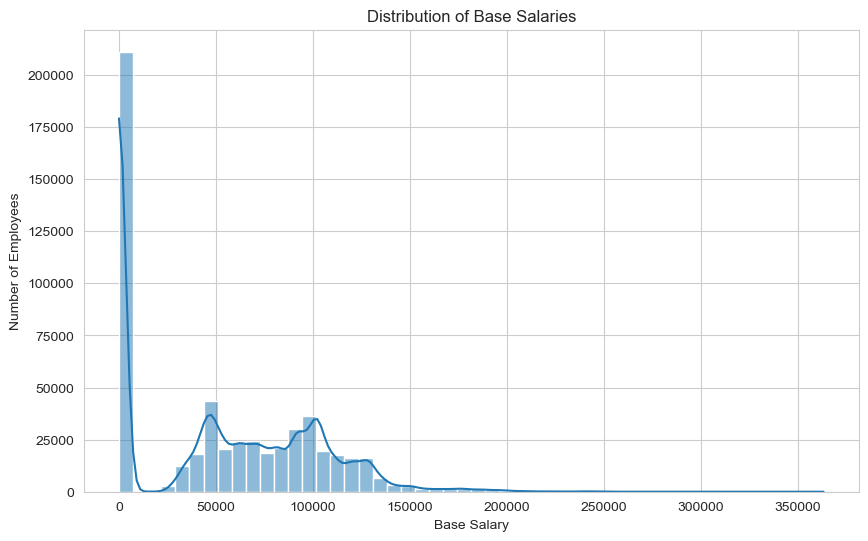

In [21]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of base salaries
plt.figure(figsize=(10, 6))
sns.histplot(data['Base Salary'], bins=50, kde=True)
plt.title('Distribution of Base Salaries')
plt.xlabel('Base Salary')
plt.ylabel('Number of Employees')
plt.show()

#### Visualization 2: Average Base Salary by Agency
A bar chart displaying the average base salary for each agency, which highlights the pay discrepancies across different agencies.


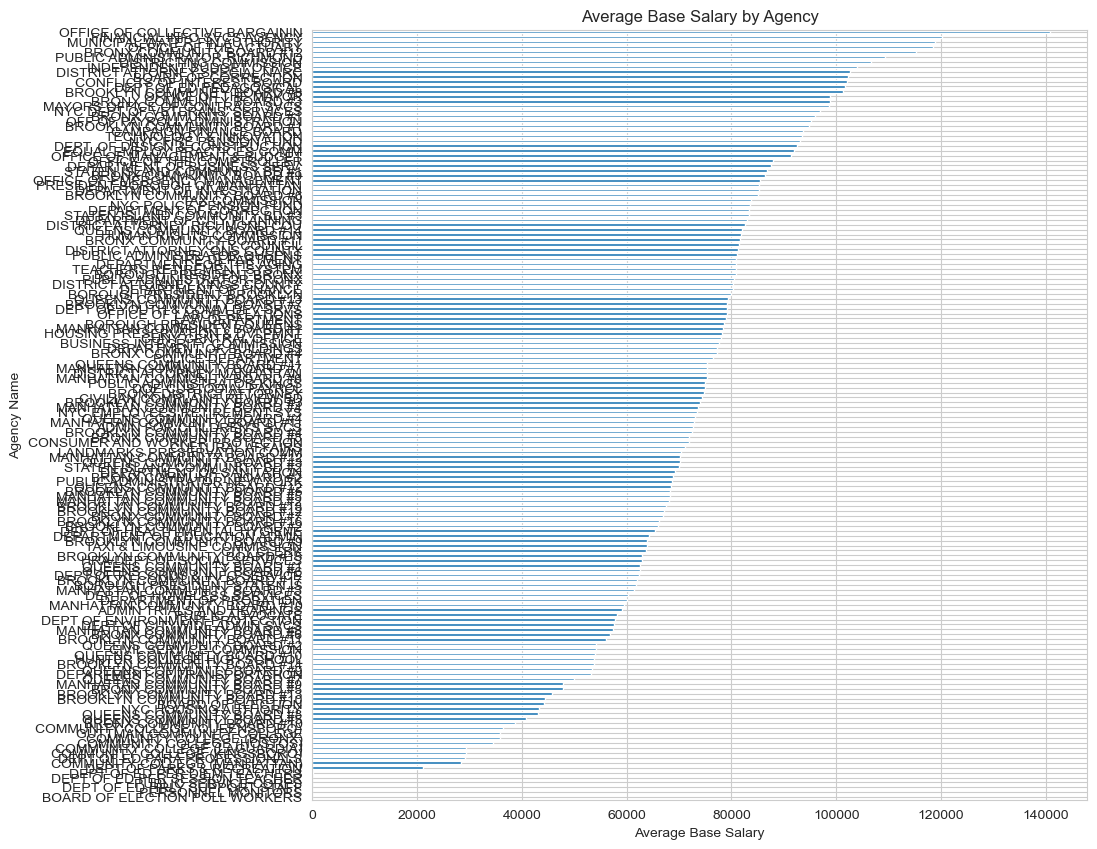

In [22]:
# Prepare the data for visualization
average_salary_by_agency = data.groupby('Agency Name')['Base Salary'].mean().sort_values()

# Plot the average base salary by agency
plt.figure(figsize=(10, 10))
average_salary_by_agency.plot(kind='barh')
plt.title('Average Base Salary by Agency')
plt.xlabel('Average Base Salary')
plt.ylabel('Agency Name')
plt.show()

#### Visualization 3: Total Overtime by Work Location Borough
This bar chart will show the total amount of overtime paid to employees in each work location borough, offering insight into which regions have the highest overtime costs.


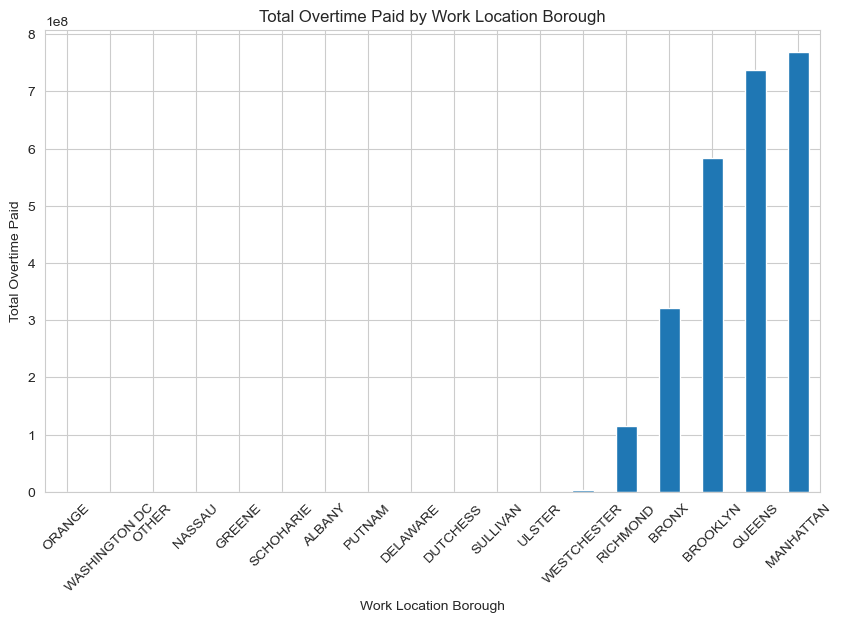

In [23]:
# Prepare the data for visualization
total_ot_by_borough = data.groupby('Work Location Borough')['Total OT Paid'].sum().sort_values()

# Plot total overtime by work location borough
plt.figure(figsize=(10, 6))
total_ot_by_borough.plot(kind='bar')
plt.title('Total Overtime Paid by Work Location Borough')
plt.xlabel('Work Location Borough')
plt.ylabel('Total Overtime Paid')
plt.xticks(rotation=45)
plt.show()


#### Visualization 4: Tenure Distribution in the Organization
A boxplot to show the distribution of tenure years across the organization, highlighting the range, median, and potential outliers in tenure.


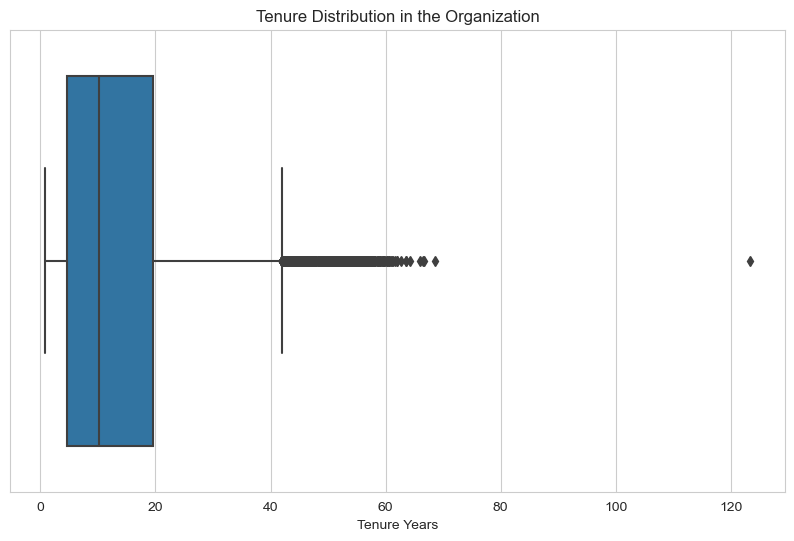

In [24]:
# Plot the distribution of tenure years
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Tenure Years'])
plt.title('Tenure Distribution in the Organization')
plt.xlabel('Tenure Years')
plt.show()


#### Visualization 5: Leave Status Proportions
A pie chart to visualize the proportions of different leave statuses (e.g., Active, Leave, etc.) within the workforce.


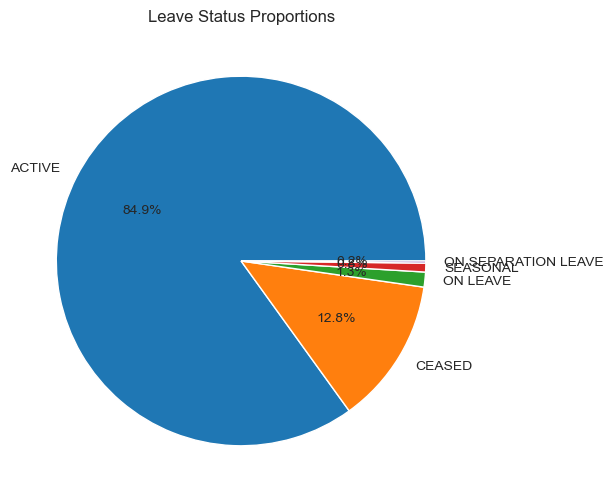

In [25]:
# Prepare the data for visualization
leave_status_counts = data['Leave Status as of June 30'].value_counts()

# Plot the leave status proportions
plt.figure(figsize=(10, 6))
leave_status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Leave Status Proportions')
plt.ylabel('')  # Hide the y-label
plt.show()
